## Using a Classification Tree to find the best predictor for unhealthiness

Finding best predictor for Unhealthy metric.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import plot_tree

In [2]:
merged_data = pd.read_csv('datasets/Merged_data_unhealthymetric.csv')
merged_data.head()

,Item,Category,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Dietary Fiber (g),Sugars (g),Protein (g),Restaurant,Meal Type,Unhealthy index
0,"6"" All-American Club",Sandwich,211.0,350,13.0,6.0,0.0,55,1220,39,1.0,5,25,Subway,Mains,2
1,"6"" Black Forest Ham",Sandwich,219.0,270,4.0,1.0,0.0,30,810,41,4.0,6,18,Subway,Mains,1
2,"6"" Buffalo Chicken (with Grilled Chicken)",Sandwich,248.0,340,12.0,3.0,0.0,55,1360,39,2.0,4,24,Subway,Mains,1
3,"6"" Chicken & Bacon Ranch (with Grilled Chicken)",Sandwich,256.0,510,27.0,10.0,0.0,100,1020,39,2.0,5,36,Subway,Mains,2
4,"6"" Chicken & Bacon Ranch (with Rotisserie-Styl...",Sandwich,256.0,530,29.0,11.0,0.0,105,1200,39,2.0,5,34,Subway,Mains,3


<AxesSubplot:>

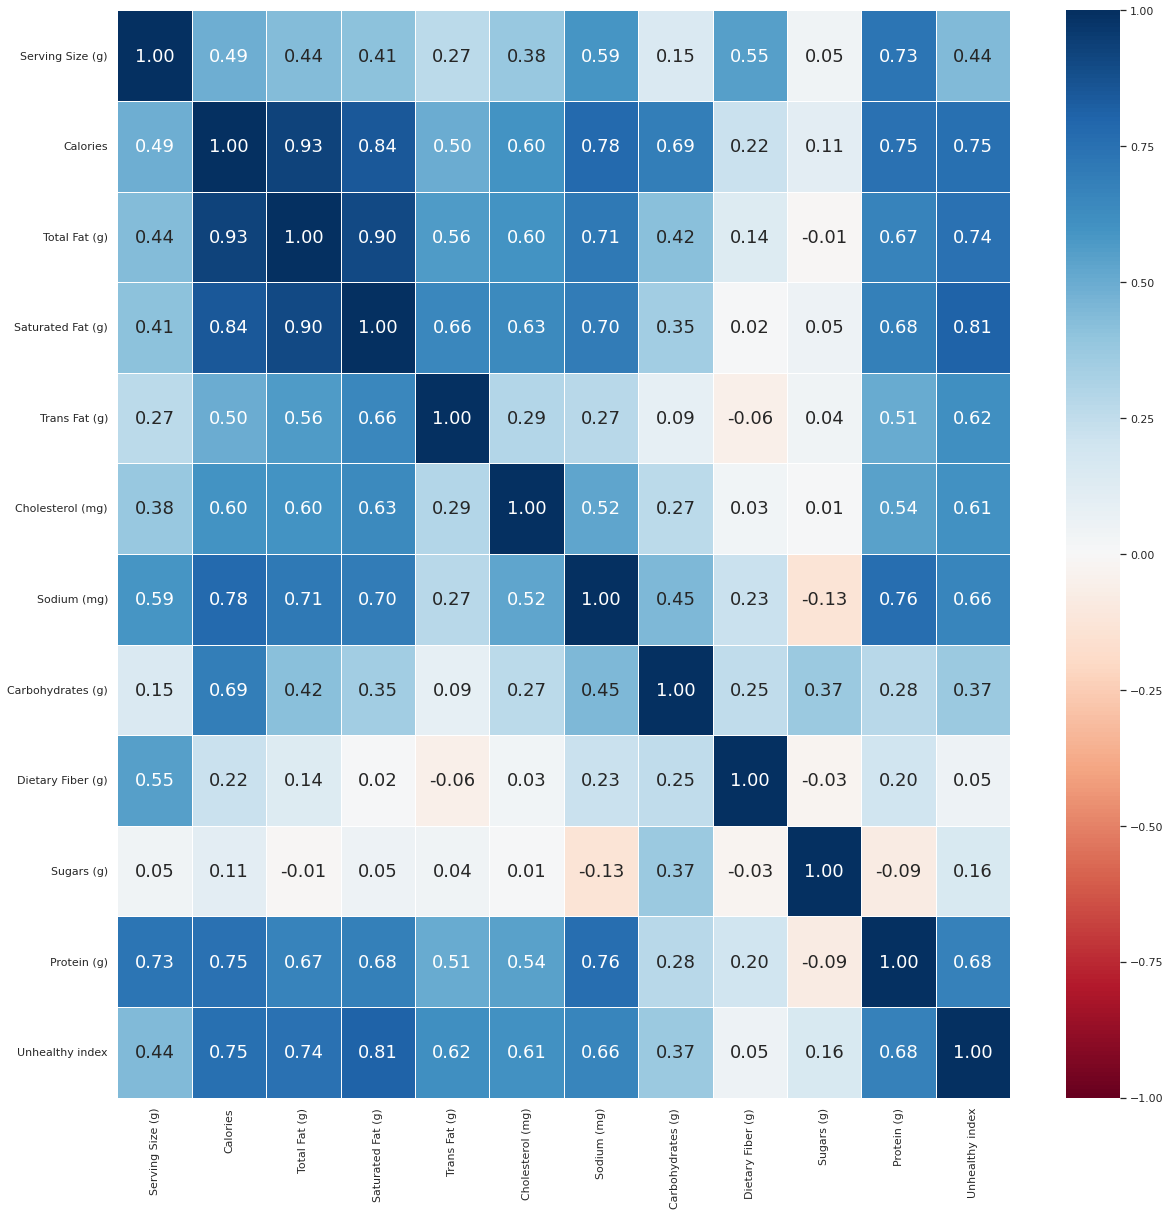

In [3]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(merged_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

From the correlation matrix, 
Saturated Fat, Calories, and Total Fat have the strongest positive correlation to the unhealthy index.

In [4]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item               389 non-null    object 
 1   Category           389 non-null    object 
 2   Serving Size (g)   389 non-null    float64
 3   Calories           389 non-null    int64  
 4   Total Fat (g)      389 non-null    float64
 5   Saturated Fat (g)  389 non-null    float64
 6   Trans Fat (g)      389 non-null    float64
 7   Cholesterol (mg)   389 non-null    int64  
 8   Sodium (mg)        389 non-null    int64  
 9   Carbohydrates (g)  389 non-null    int64  
 10  Dietary Fiber (g)  389 non-null    float64
 11  Sugars (g)         389 non-null    int64  
 12  Protein (g)        389 non-null    int64  
 13  Restaurant         389 non-null    object 
 14  Meal Type          389 non-null    object 
 15  Unhealthy index    389 non-null    int64  
dtypes: float64(5), int64(7), o

### Multi-Class Classification Tree

Response Variable: Unhealthy index

Predictor Features: Serving Size (g), Calories, Total Fat (g),Saturated Fat (g), Trans Fat (g), Cholesterol (mg),Sodium (mg), Carbohydrates (g), Dietary Fiber (g), Sugars (g), Protein (g)

In [5]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ['Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)']

y = pd.DataFrame(merged_data['Unhealthy index'].astype('category'))
X = pd.DataFrame(merged_data[predictors]) 

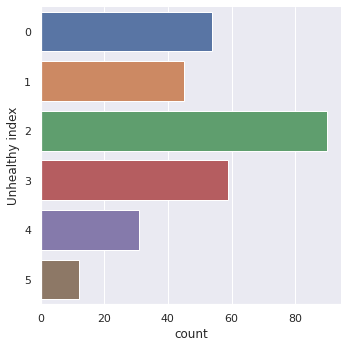

In [6]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "Unhealthy index", data = y_train, kind = "count")

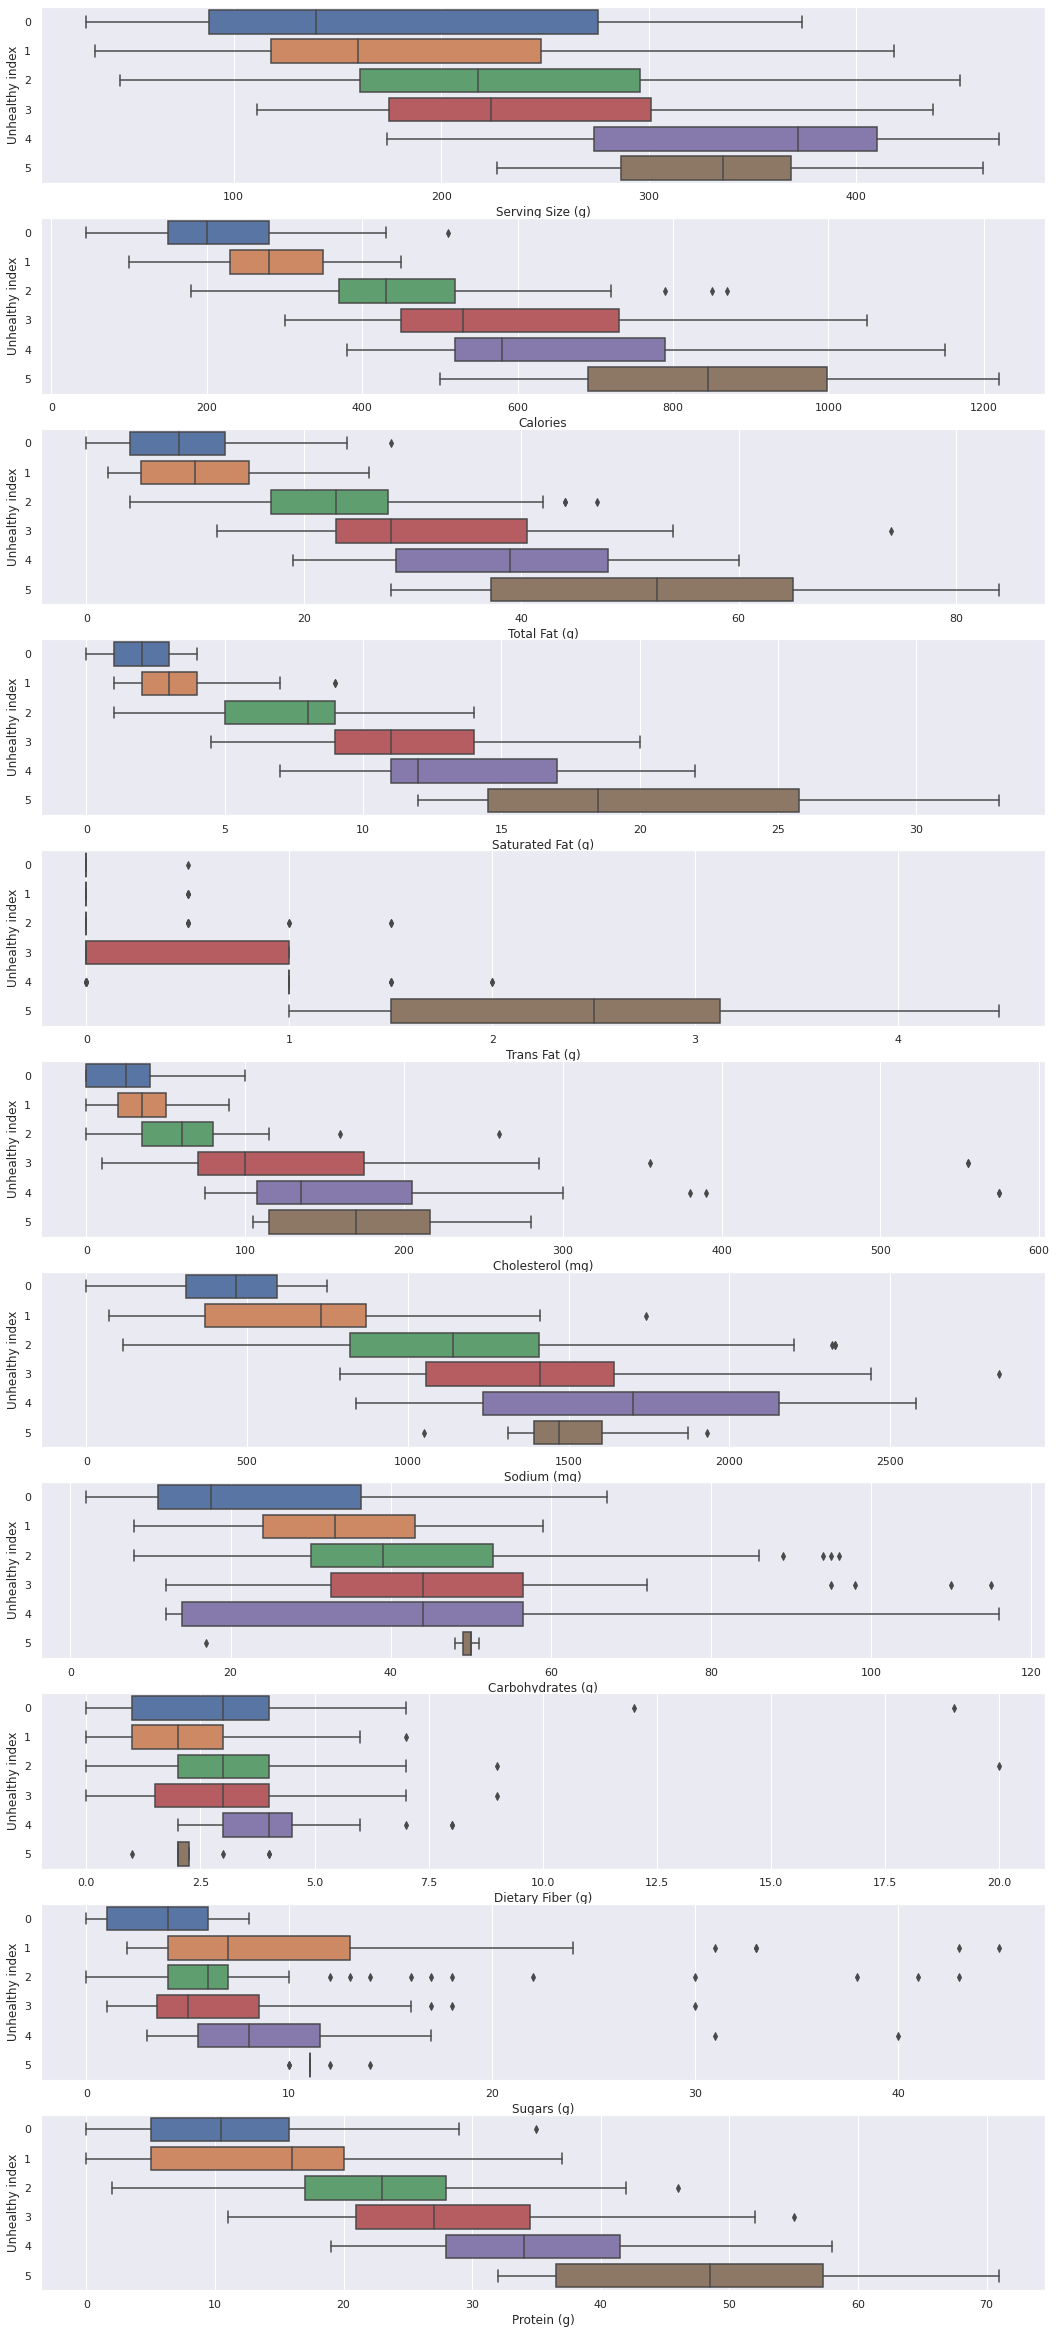

In [7]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(11, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "Unhealthy index", data = trainDF, orient = "h", ax = axes[count])
    count += 1

From these Boxplots,
we can infer that Saturated fats has the strongest relationship with the Unhealthy index. While Sugars and 
Dietary Fibers have the weakest relationship with the Unhealthy index.


In [8]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9106529209621993

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8979591836734694



<AxesSubplot:>

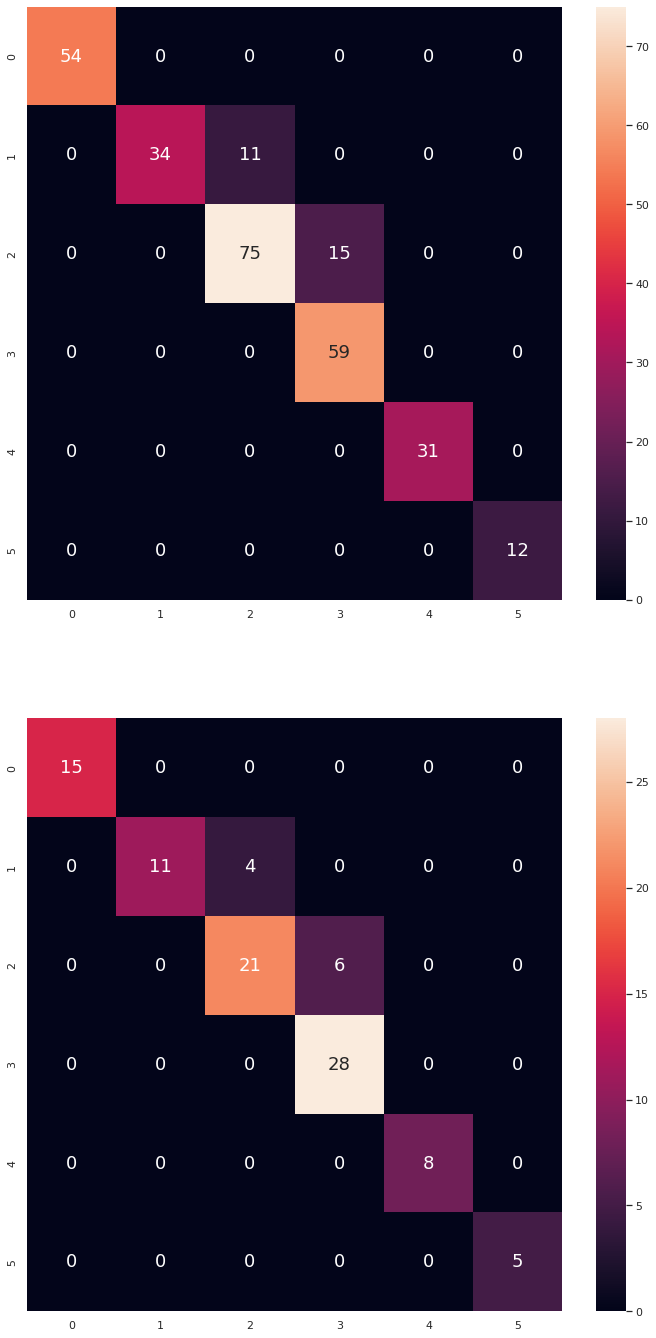

In [9]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

From the Confusion matrix, we observed that our model tends misclassify some items as having an "Unhealthy index" of 1 when it is actually 2. It is also misclassifying some items as having a score of 2 when it is actually 3.

Overall the Classification accuracy is very high with no overfitting.

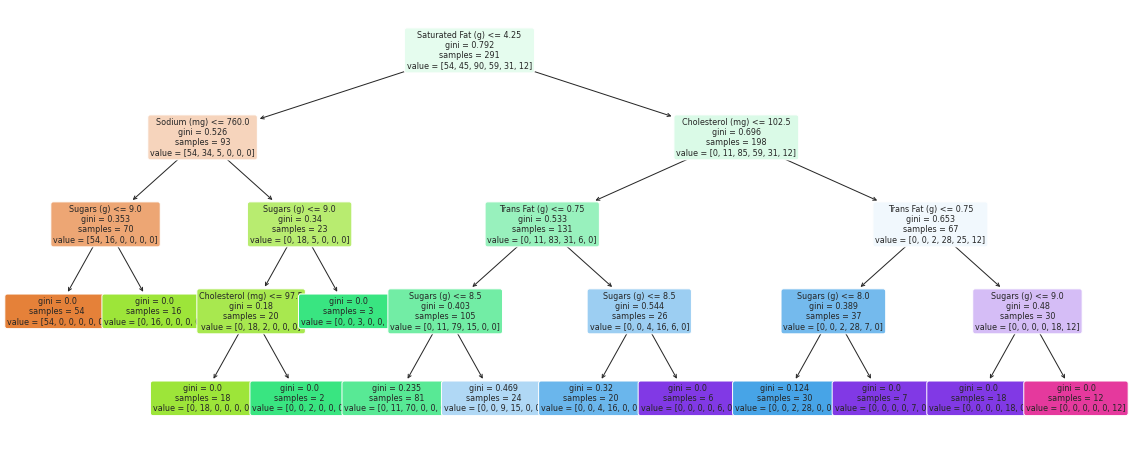

In [10]:
#ploting the Decision Tree
f = plt.figure(figsize=(20,8))
treedot = plot_tree(dectree,fontsize=8,
                            feature_names = X_train.columns,
                            filled = True,
                            rounded = True,)

From this decision tree we can see that Saturated Fats is the primary variable that best splits the data. Any items with more than 4.25g of Saturated fats is likely to score at least a 2 on the Unhealhty index, while items with 4.25g or less Saturated fats is likely 2 or less on the Unhealthy index.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3cd1c4af-daef-4005-958a-27a380c5f533' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>